In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#++++++++++++++++ Nomes dos ativos ++++++++++++++++
ativo = ['A','B','C']
n = len(ativo)

#++++++++++++++++ Construção dos ativos ++++++++++++++++
A = np.array([4,5,6,5,5,6,7,8,4,3,5])
B = np.array([1,5,10,4,11,7,8,3,1,5,7])
C = np.array([3,4,3,4,5,6,5,3,5,3,4])

#++++++++++++++++ Dataframe dos ativos ++++++++++++++++
df = pd.DataFrame([A,B,C], index=ativo)
prec = df.T  # Transposta para colocar os dados em colunas

#++++++++++++++++ Retorno dos preços ++++++++++++++++
ri = prec / prec.shift(1)
mi = ri.mean()   # Retorno médio dos ativos por coluna
sigma = ri.cov() # Covariância da carteira

print(' ')
print('+++++++++ Matriz de covariância da carteira +++++++++ ')
print(sigma)


 
+++++++++ Matriz de covariância da carteira +++++++++ 
          A         B         C
A  0.102785  0.013396 -0.015790
B  0.013396  3.266941 -0.138910
C -0.015790 -0.138910  0.134395


 
+++++++++ Matriz de correlação da carteira +++++++++ 
          A         B         C
A  1.000000  0.023117 -0.134347
B  0.023117  1.000000 -0.209639
C -0.134347 -0.209639  1.000000
 
Retorno esperado da carteira =  132.27%
Risco da carteira =  57.18%


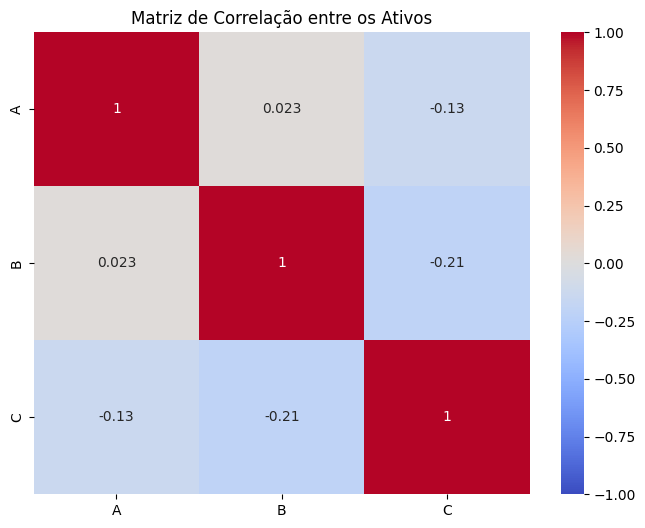

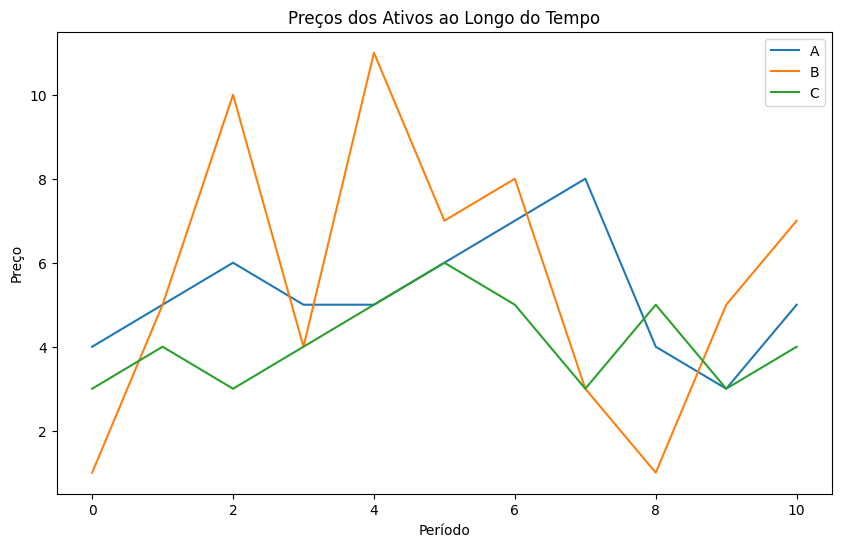

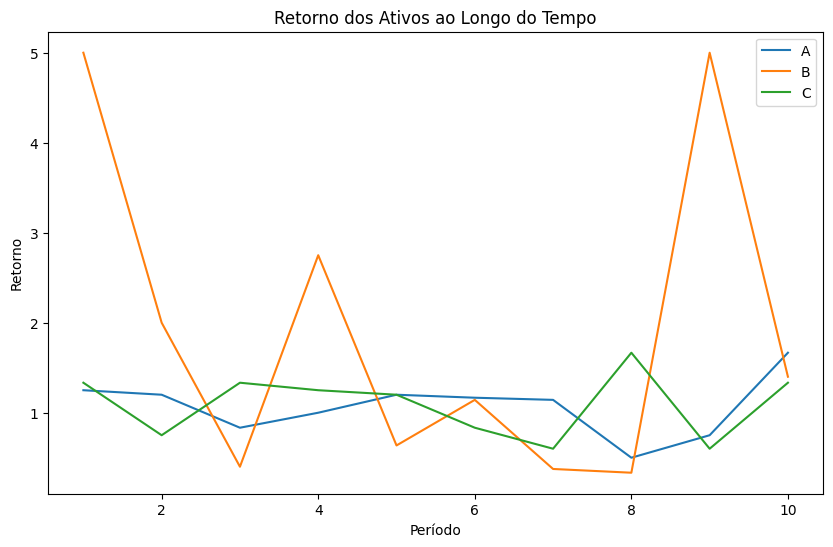

In [8]:

#++++++++++++++++ Calculando a correlação entre os ativos ++++++++++++++++
correlation_matrix = ri.corr()
print(' ')
print('+++++++++ Matriz de correlação da carteira +++++++++ ')
print(correlation_matrix)

#++++++++++ Peso da alocação dos investimentos ++++++++++
w = np.array([0.6, 0.3, 0.1]) # Pesos fixos

############# RETORNO E RISCO DA CARTEIRA #############
retorno = np.sum(w * mi)
risco = np.sqrt(np.dot(w.T, np.dot(sigma, w)))
#######################################################

print(' ')
print('Retorno esperado da carteira = ', str(round(100 * retorno, 2)) + '%')
print('Risco da carteira = ', str(round(100 * risco, 2)) + '%')

#++++++++++ Plotando a matriz de correlação ++++++++++
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre os Ativos')
plt.show()

#++++++++++ Plotando os preços dos ativos ++++++++++
prec.plot(figsize=(10, 6))
plt.title('Preços dos Ativos ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Preço')
plt.legend(ativo)
plt.show()

#++++++++++ Plotando os retornos dos ativos ++++++++++
ri.plot(figsize=(10, 6))
plt.title('Retorno dos Ativos ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Retorno')
plt.legend(ativo)
plt.show()